Stan Początkowy
[[-1  1  1  1  1]
 [-1  1  1 -1  1]
 [-1  1  1  1  1]
 [-1  1 -1  1  1]
 [ 1 -1  1 -1  1]]
Stan Końcowy
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


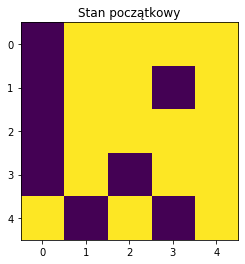

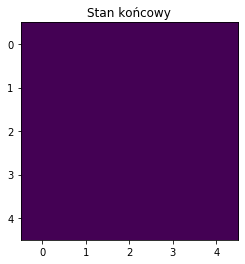

In [3]:
## Python

import pdb
import numpy as np
import matplotlib.pyplot as plt
## Konfiguracja siatki
N = 5 # Szerokość  
M = 5 # Wysokość 
## Ustawienia temperatury
temperature = 0.5
BETA = 1 / temperature

def initRandState(N, M):
    block = np.random.choice([-1, 1], size = (N, M))
    return block


def magnetizationForState(state):
    return np.sum(state)

def costForCenterState(state, i, j, n, m):
    centerS = state[i, j]
    neighbors = [((i + 1) % n, j), ((i - 1) % n, j),
                 (i, (j + 1) % m), (i, (j - 1) % m)]
    ## Operator modulo został zastosowany w celu narzucenia tzw. periodycznych warunków brzegowych,
    ## w przypadku 2D sprowadza się to do uczynienia z siatki kształtu przypominającego donuta,
    ## jeżeli nic z tego nie rozumiesz, zignoruj ten komentarz



    interactionE = [state[x, y] * centerS for (x, y) in neighbors]
    return np.sum(interactionE)

def magnetizationForState(state):
    return np.sum(state)

def mcmcAdjust(state):
    n = state.shape[0]
    m = state.shape[1]
    x, y = np.random.randint(0, n), np.random.randint(0, m)
    centerS = state[x, y]
    cost = costForCenterState(state, x, y, n, m)
    if cost < 0:
        centerS *= -1
    elif np.random.random() < np.exp(-cost * BETA):
        centerS *= -1
    state[x, y] = centerS
    return state

def runState(state, n_steps, snapsteps = None):
    if snapsteps is None:
        snapsteps = np.linspace(0, n_steps, num = round(n_steps / (M * N * 100)), dtype = np.int32)
    saved_states = []
    sp = 0
    magnet_hist = []
    for i in range(n_steps):
        state = mcmcAdjust(state)
        magnet_hist.append(magnetizationForState(state))
        if sp < len(snapsteps) and i == snapsteps[sp]:
            saved_states.append(np.copy(state))
            sp += 1
    return state, saved_states, magnet_hist

### Uruchomienie symulacji
init_state = initRandState(N, M)
print("Stan Początkowy")
print(init_state)
plt.imshow(init_state)
plt.title("Stan początkowy")
final_state, states, magnet_hist = runState(init_state, 1000)
print("Stan Końcowy")
print(final_state)
plt.figure()
plt.title("Stan końcowy")
plt.imshow(final_state)


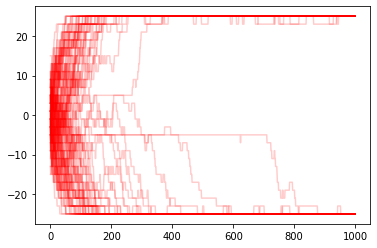

In [4]:
## Każdy uzyskany w wyniku osobnej symulacji szereg zapamiętujemy w liście
results = []
for i in range(100):
    init_state = initRandState(N, M)
    final_state, states, magnet_hist = runState(init_state, 1000)
    results.append(magnet_hist)

## W każdym z otrzymanych szeregów wykreślamy kolejne krzywe magnetyzacji,
## ustalając przezroczystość tak, aby móc obserwować nakładające się na siebie kształty
for mh in results:
    plt.plot(mh,'r', alpha=0.2)